# Potato Crop Yield as a Function of Fertilizer Usage 

## Import Libraries 

In [698]:
#Necessary libraries are imported : Pandas, Numpy, Matplotlib, Skikit-learn, and Sympy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import symbols, Eq, solve


## Import and explore the Dataset

In [699]:
#By sorting the values we can generally see a directly proportional relationship between fertilizer use and crop yield 
yield_data = pd.read_csv("fertilizer_yield_data.csv")
yield_data.sort_values(by = "Fertilizer_Use_kg_per_ha", ascending = False)

,Fertilizer_Use_kg_per_ha,Potato_Yield_tons_per_ha
531,299.915302,NaN
847,299.062276,158.654625
532,298.991051,NaN
475,297.889439,NaN
390,297.151543,156.698981
...,...,...
205,2.759115,3.724586
128,2.085639,8.600614
72,1.656635,4.410402
208,1.518475,5.549582


In [700]:
yield_data.info()
#calling the .info() method indicates the dependent variable column contains 54 missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fertilizer_Use_kg_per_ha  1000 non-null   float64
 1   Potato_Yield_tons_per_ha  946 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


## Drop Rows with Empty Values 

In [701]:
#All rows with missing values are removed 
yield_data = yield_data.dropna(how = "any")
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fertilizer_Use_kg_per_ha  946 non-null    float64
 1   Potato_Yield_tons_per_ha  946 non-null    float64
dtypes: float64(2)
memory usage: 22.2 KB


## Rename Columns and Drop Duplicate rows

In [702]:
#Columns are renamed for readability and redundant rows are removed
#Index is reset after removal of rows

yield_data = yield_data.rename(columns = {"Fertilizer_Use_kg_per_ha":"Fertilizer_Use(Kg/Hectare)", "Potato_Yield_tons_per_ha":"Potato_Yield(Tons/Hectare)" })
yield_data = yield_data.drop_duplicates()
yield_data = yield_data.reset_index().drop("index", axis = 1)
yield_data.head(10)

,Fertilizer_Use(Kg/Hectare),Potato_Yield(Tons/Hectare)
0,112.362036,82.797504
1,285.214292,147.818208
2,219.598183,133.595778
3,179.597545,118.254515
4,46.805592,41.933082
5,46.798356,43.490941
6,17.425084,21.138200
7,259.852844,146.736315
8,6.175348,11.190998
9,249.732792,143.234503


## Split the Data into Independent Features and Dependent Variable 

In [703]:
#Data is split into values for the single independent feature and the dependent variable 
x = yield_data.iloc[:,:-1].values 
y = yield_data.iloc[:,-1].values 

## Split the Data into Training and Test Subsets 

In [704]:
#Data is split into training and test sets using an 80%/20% split respectively 
#random_state is set to zero for reproducability of results 
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Transform the Independent Features into Polynomial Form

In [705]:
#A PolynomialFeatures object is create with a 'degree' of 2, thereby making the model quadratic
#Training data and test data is then converted into higher degree terms 

poly_converter = PolynomialFeatures(degree = 2)
x_train_poly = poly_converter.fit_transform(x_train)
x_test_poly = poly_converter.fit_transform(x_test)

## Instantiate and Train the Regressor Model 

In [706]:
#a Linear regression model is instantiated and trained using the polynomic converted features and training subset of the dependent variable

poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly,y_train)

LinearRegression()

## Visualize Training Data vs. Predictions Made from Training Data 

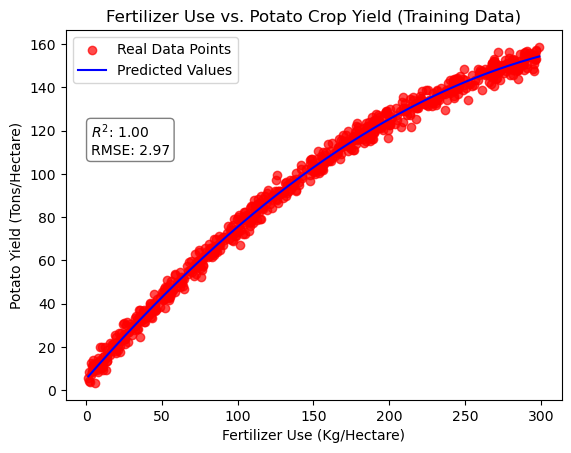

In [707]:
#Actual data points in training subset are plotted alonside predicted values
 

#predicted values of y and training values for x are sorted in ascending order
#This ensures that the non-linear relationships produce a consistant model where predictions are plotted sequentially
#Without this sorting, the non-linear relationships will create non-sensical artifacts, turning the model into a thickened band or
#a group of 'zig-zagged' lines
poly_predictions = poly_regressor.predict(x_train_poly)
sorted_indices = np.argsort(x_train.flatten())
x_train_sorted = x_train[sorted_indices]
poly_predictions_sorted = poly_predictions[sorted_indices]

r2 = r2_score(y_train, poly_predictions)
rmse = mean_squared_error(y_train, poly_predictions, squared=False)

plt.figure()
plt.scatter(x_train,y_train, color = "red", alpha = 0.7, label = "Real Data Points")
plt.plot(x_train_sorted, poly_predictions_sorted, color = "blue", label = "Predicted Values")
plt.text(
    0.05, 0.75, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
)
plt.title("Fertilizer Use vs. Potato Crop Yield (Training Data)")
plt.xlabel("Fertilizer Use (Kg/Hectare)")
plt.ylabel("Potato Yield (Tons/Hectare)")
plt.legend()
plt.show()


## Visualize Test Data vs. Predictions Made from Test Data 

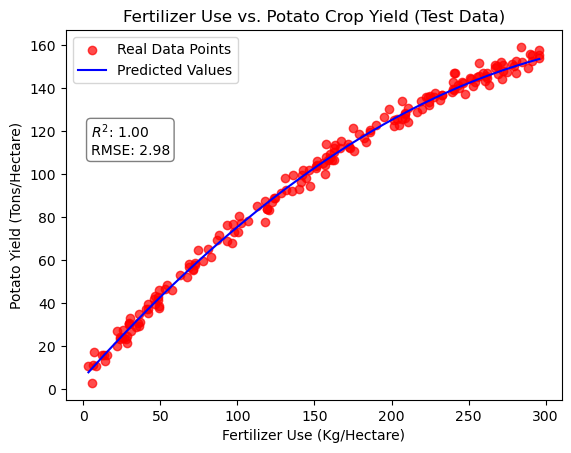

In [708]:
#Test data is similarly sorted and visualized 

poly_predictions_test = poly_regressor.predict(x_test_poly)
sorted_indices_test = np.argsort(x_test.flatten())
x_test_sorted = x_test[sorted_indices_test]
poly_predictions_test_sorted = poly_predictions_test[sorted_indices_test]

r2_test = r2_score(y_test, poly_predictions_test)
rmse_test = mean_squared_error(y_test, poly_predictions_test, squared=False)


plt.figure()
plt.scatter(x_test,y_test, color = "red", alpha = 0.7, label = "Real Data Points")
plt.plot(x_test_sorted, poly_predictions_test_sorted, color = "blue", label = "Predicted Values")
plt.text(
    0.05, 0.75, f"$R^2$: {r2_test:.2f}\nRMSE: {rmse_test:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
)
plt.title("Fertilizer Use vs. Potato Crop Yield (Test Data)")
plt.xlabel("Fertilizer Use (Kg/Hectare)")
plt.ylabel("Potato Yield (Tons/Hectare)")
plt.legend()
plt.show()


## Model Full Range of Hypothetical Fertilizer Usage

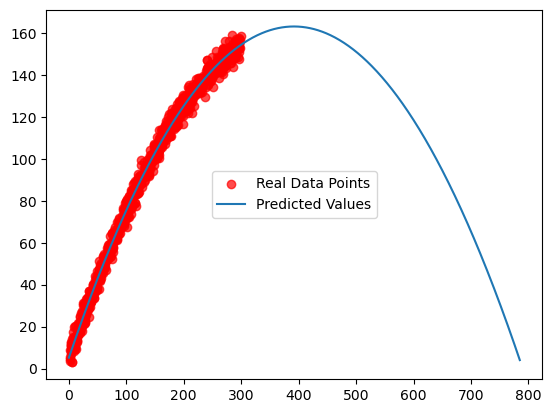

'The optimal fertilizer usage for a desired yield of 163.12 Tons/Hectare is 391.58 Kg/Hectare.'

In [709]:
#In the code block below, the full domain for possible fertilizer usage is explored to demonstrate the parabolic nature of its relationship
#to potato crop yield. An array of values from 0 to 785 is defined and then converted to polynomic form.
#The converted values are used to predict the full range of possible potato crop yields 

hypothetical_fertilizer_values = [x for x in range(0,786)]
hypothetical_fertilizer_DF = pd.DataFrame(hypothetical_fertilizer_values)
hypothetical_fertilizer_poly = poly_converter.fit_transform(hypothetical_fertilizer_DF)

hypothetical_predictions = poly_regressor.predict(hypothetical_fertilizer_poly)

#Predicted values are plotted along side the full data set of actual values 
#Hypothetical values for fertilizer usage proceed on beyond the known data set
plt.figure()
plt.scatter(x,y, color = 'red', alpha = 0.7, label = "Real Data Points")
plt.plot(hypothetical_fertilizer_DF, hypothetical_predictions, label = "Predicted Values")
plt.legend(loc = "center")
plt.show()

#The highest possible potato yield as a function of fertilizer use only 
highest_yield = max(hypothetical_predictions)


def x_from_y(y_value):
    
    #Function takes a desired crop yield as an input
    #Function extracts the model's coefficients, reconstructs its equation, and then uses the Sympy library to solve for x (fertilizer usage)
    
    coefficients = poly_regressor.coef_
    intercept = poly_regressor.intercept_
    
    x, y = symbols("x y")
    equation = Eq(intercept + (coefficients[1]*x) + (coefficients[2]*(x**2)), y_value)
    
    solution = solve(equation, x)
    for i in range(len(solution)):
        if solution[i] < 0:
            solution[i] = 0
    
    #The parabolic nature of the trend implies that, for most crop yields, there will be two different fertilizer values, a high and low. 
    #Assuming the yield input is within the possible range, the function returns the lowest fertilizer value
    #This thereby ensures the most economically practical fertilizer usage for a given desired crop yield
    
    solution_statement = f"The optimal fertilizer usage for a desired yield of {round(y_value,2)} Tons/Hectare is {round(min(solution),2)} Kg/Hectare."
    if 0 < y_value <= highest_yield:
        return solution_statement
    else: 
        return f"Your desired potato yield is beyond the possible range of values. Yield must be between 0 and {highest_yield}."

#The highest possible yield is passed to the argument, outputing the optimal fertilizer usage for maximum potato crop yield  
#From the graph we can see the diminishing returns to crop yield and fertilizer usage increases    
x_from_y(highest_yield)




## Visualize Residual Difference Between Crop Yield Predictions and Real Crop Yield Data 

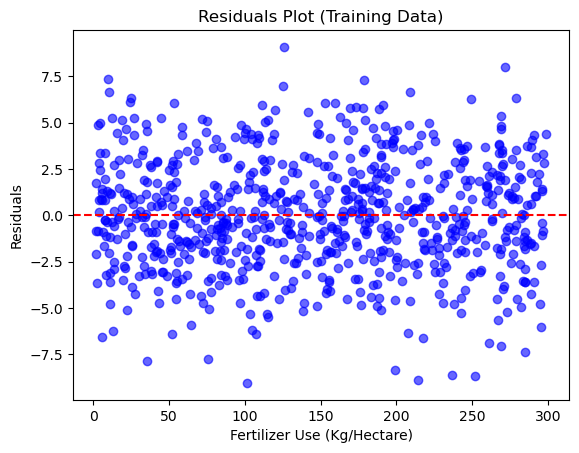

In [710]:
#In the charts below, the real data's distribution around the predicted model is precisely visualized 
#The 0.0 line represents zero difference between real values and predicted ones
#Each point's placement, relative to the dotted line, represents the degree to which it is greater or less than the analagous predicted value 

residuals = y_train - poly_predictions
plt.scatter(x_train, residuals, color = 'blue', alpha = 0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fertilizer Use (Kg/Hectare)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Training Data)')
plt.show()


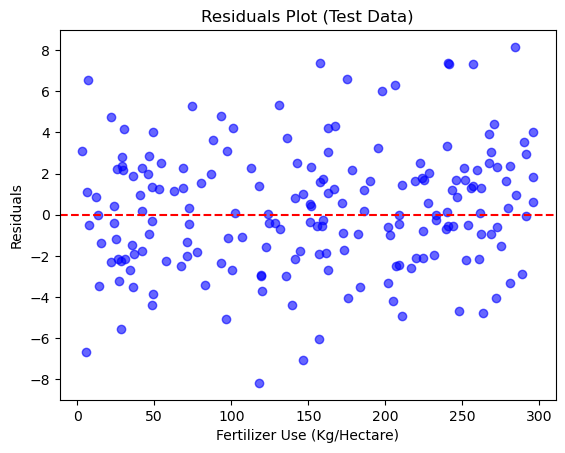

In [711]:
residuals_test = y_test - poly_predictions_test
plt.scatter(x_test, residuals_test, color = 'blue', alpha = 0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fertilizer Use (Kg/Hectare)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Test Data)')
plt.show()